<a href="https://colab.research.google.com/github/Nilswonderland/Portfolio/blob/main/Assignment_1_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WITH PANDAS AND MATPLOTLIB

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [2]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [ ]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
g = kill.groupby('gender').count()
g

,id,name,date,manner_of_death,armed,age,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
gender,,,,,,,,,,,,,
F,107,107,107,107,107,104,98,107,107,107,107,104,107
M,2428,2428,2428,2428,2419,2354,2242,2428,2428,2428,2428,2366,2428


In [ ]:
kill.groupby("gender")

In [ ]:
g["id"]

gender
F     107
M    2428
Name: id, dtype: int64

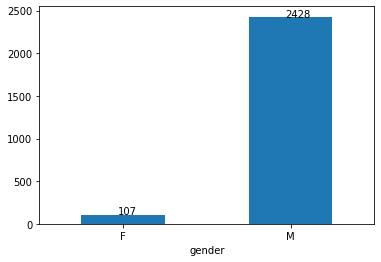

In [ ]:
a = g["id"].plot.bar(rot = 0)
for p in a.patches:
  a.annotate((p.get_height()), (p.get_x()+0.22, p.get_height()+0.5))

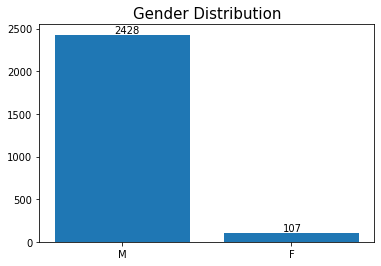

In [ ]:
# with matplotlib


## 2: Plot 7 most common kill weapons

In [ ]:
most= kill.armed.value_counts().head(7)
most

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

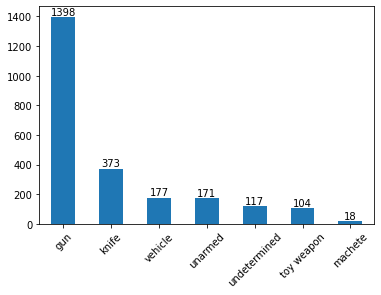

In [ ]:
most.plot.bar(rot = 45)
for i in range(len(most)):
  plt.text(i, most[i], most[i], ha = "center", va = "bottom")


## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
kill['age'].value_counts()

25.0    103
36.0     91
31.0     85
24.0     83
29.0     83
       ... 
6.0       1
14.0      1
80.0      1
12.0      1
79.0      1
Name: age, Length: 73, dtype: int64

In [ ]:
above_25 = (kill['age'] > 25).value_counts()
above_25 

True     1905
False     630
Name: age, dtype: int64

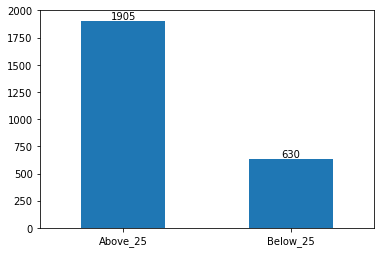

In [ ]:
above_25  = above_25 .set_axis(['Above_25', 'Below_25'])
above_25 .plot.bar(rot= 0)
for i in range(len(above_25 )):
  plt.text(i, above_25 [i], above_25 [i], ha = "center", va = "bottom")

## 4: Plot number of killed poeple by race

In [ ]:
kill['race'].unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [ ]:
kill['race'].value_counts

<bound method IndexOpsMixin.value_counts of 0         A
1         W
2         H
3         W
4         H
       ... 
2530    NaN
2531    NaN
2532    NaN
2533      B
2534      B
Name: race, Length: 2535, dtype: object>

In [ ]:
kill.groupby("race").count()

,id,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,flee,body_camera
race,,,,,,,,,,,,,
A,39,39,39,39,39,38,39,39,39,39,39,37,39
B,618,618,618,618,614,609,618,618,618,618,618,605,618
H,423,423,423,423,422,413,423,423,423,423,423,411,423
N,31,31,31,31,31,31,31,31,31,31,31,29,31
O,28,28,28,28,28,28,28,28,28,28,28,28,28
W,1201,1201,1201,1201,1200,1192,1201,1201,1201,1201,1201,1178,1201


In [ ]:
b = kill.groupby('race').id.count().sort_values(ascending= False)
b

race
W    1201
B     618
H     423
A      39
N      31
O      28
Name: id, dtype: int64

In [ ]:
kill[['race', 'id']].groupby(['race'])['id'].count().sort_values(ascending= False) #optional

race
W    1201
B     618
H     423
A      39
N      31
O      28
Name: id, dtype: int64

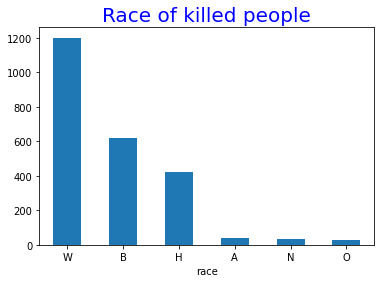

In [ ]:
b.plot.bar(rot = 0)
title_obj = plt.title("Race of killed people") 
plt.setp(title_obj, color='b', fontsize= 20);        


## 5: Killed People According to Races (Pie Chart)

In [ ]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [ ]:
c = kill.race.unique()
c

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [ ]:
kill.race.value_counts() # It doesn't count null values. I don't know why?

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [ ]:
kill['race'].isna().sum() 

195

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [10]:
drop_index = kill[(kill['race'].isna())].index
drop_index

Int64Index([  59,  241,  266,  340,  398,  417,  426,  470,  518,  537,
            ...
            2520, 2521, 2522, 2524, 2526, 2527, 2529, 2530, 2531, 2532],
           dtype='int64', length=195)

In [11]:
kill.drop(index=drop_index, inplace=True)

In [12]:
kill['race'].isna().sum() 

0

In [13]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', 'N'], dtype=object)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

array([1168,  592,  401,   36,   29,   28])

In [23]:
kill['race'].index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2514, 2515, 2516, 2517, 2519, 2523, 2525, 2528, 2533, 2534],
           dtype='int64', length=2340)

In [14]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [15]:
kill['race'].count()

2340

In [25]:
y = np.array(kill["race"].value_counts())
y

array([1201,  618,  423,   39,   31,   28])

In [29]:
labels = np.array(kill['race'].unique())
labels

array(['A', 'W', 'H', 'B', 'O', 'N'], dtype=object)

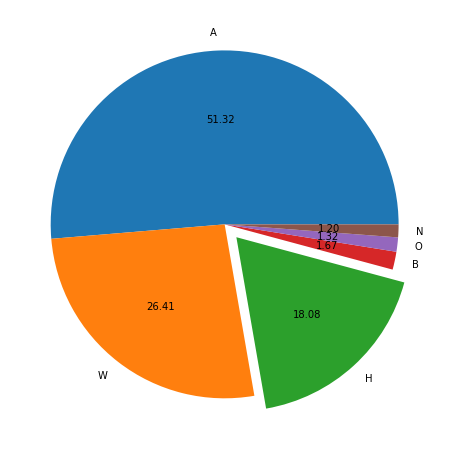

In [38]:
plt.figure(figsize = (10,8))
y = np.array(kill["race"].value_counts())
labels = np.array(kill['race'].unique())
myexplode = [0, 0, 0.1, 0, 0, 0]
plt.pie(y, labels = labels, explode=myexplode, labeldistance= 1.1 , autopct="%.2f")

plt.show()